### Importing the necessary libraries

In [2]:
import matplotlib.pyplot as plt

### Creating a binary classification dataset on which the perceptron will be trained

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

### Making a scatter plot of the dataset

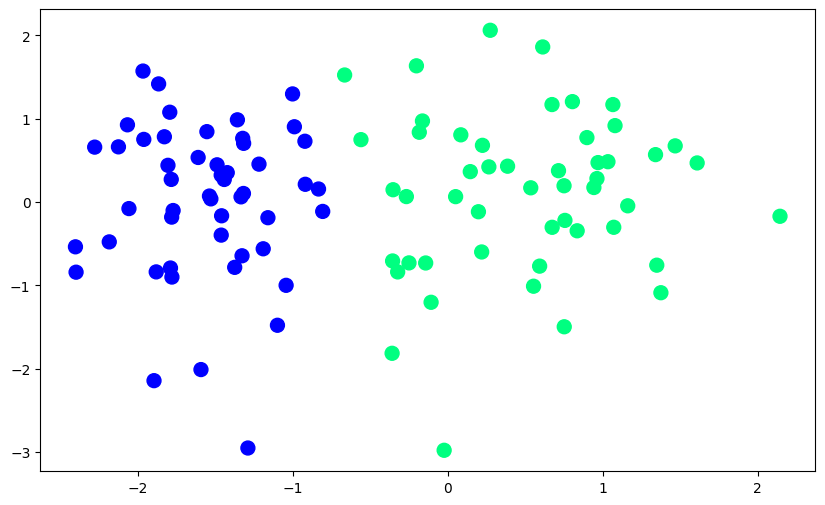

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

### Defining a step function which will be used as the activation function for the perceptron model

In [4]:
def step(z):
    return 1 if z>0 else 0

### Defining the perceptron model function which takes the input data and the predicted value as parameters and returns the bias and the line parameters for the decision boundary

In [5]:
def perceptron(X,y):
    
    # adding a column of 1s to X for bias
    X = np.insert(X,0,1,axis=1)
    # initializing weights to 1
    weights = np.ones(X.shape[1])
    # defining learning rate which will be used to update weights in each iteration
    lr = 0.1

    # training the perceptron for 1000 iterations (1000 refers to epochs)
    
    for i in range(1000):
        # randomly selecting a sample from X (selecting a random row between 0 and 100)
        j = np.random.randint(0,100)
        # predicting the output for the selected sample using the step function
        y_hat = step(np.dot(X[j],weights))
        # updating the weights using the formula weights(new) = weights(old) + lr*(y-y_hat)*X
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    # returning the bias and weights
    return weights[0],weights[1:]
        

In [6]:
intercept_,coef_ = perceptron(X,y)

### Printing the bias and the line parameters for the decision boundary

In [7]:
print(coef_)

[1.37753487 0.04200369]


In [9]:
print(intercept_)

0.9


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

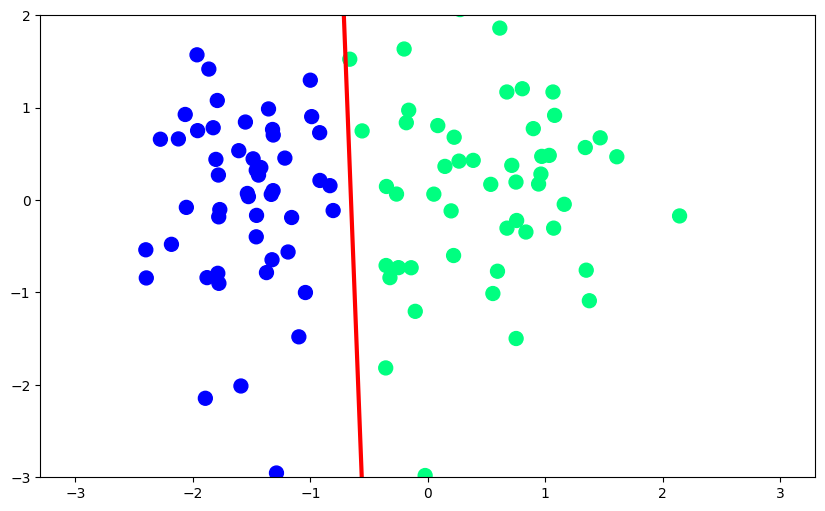

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)